# Exploring Line-Intensity Cube Predictions with $\texttt{limlam}\_\texttt{mocker}$

CTA200H Computing in Astrophysics Summer 2022 Final Project

Prof.: Norman Murray

TA: Fergus Horrobin

Supervisor: Dr. Dongwoo Chung $\&$ Prof. Dick Bond

Student: Patrick Horlaville

## 0: Prelude

### 0.1: Setting up $\texttt{limlam}\_\texttt{mocker}$

The package was cloned in my home directory

### 0.2: A Quick Inspection

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ppcat = np.load('./catalogues/peakpatchcatalogue_1pt4deg_z2pt4-3pt4.npz', allow_pickle=True)

In [3]:
print(ppcat.files)

['cosmo_header', 'M', 'zform', 'vx', 'zhalo', 'vy', 'y', 'x', 'vz', 'z']


In [4]:
M = ppcat['M']
z_halo = ppcat['zhalo']

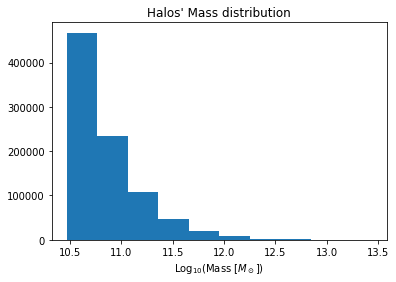

In [41]:
plt.hist(np.log10(M))
plt.title(r"Halos' Mass distribution")
plt.xlabel(r'$\rm{Log}_{10}$(Mass [$M_\odot$])')
plt.savefig("mass_distribution.pdf")

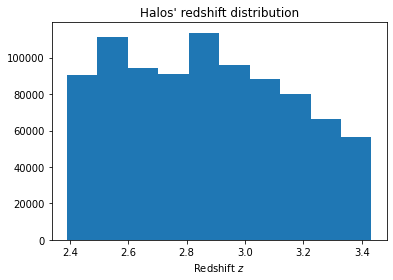

In [37]:
plt.hist(z_halo)
plt.title(r"Halos' redshift distribution")
plt.xlabel(r"Redshift $z$")
plt.savefig("redshift_distribution.pdf")

While Li+2016 has its range of redshift values between 2.4 and 2.8, our catalogue with $\texttt{limlam}\_\texttt{mocker}$ covers higher redshift. Therefore, on average, the redshift of our catalog should be higher than the redshift from Li+2016.

## 0.3: A Few Tweaks

Upon having modified some parts of the $\texttt{limlam}\_\texttt{mocker}$ code by adding an $\texttt{allow}\_\texttt{pickle=True}$ argument, we should now be able to read $\texttt{cosmo}\_\texttt{header}$

In [7]:
ppcat['cosmo_header']

array({'h': 0.7, 'sigma8': 0.82, 'Omega_M': 0.286, 'Omega_L': 0.714, 'Omega_B': 0.047, 'ns': 0.96},
      dtype=object)

## 1: Mean CO brightness versus minimum halo mass

1.1 -  Loading simulation & computing average CO brightness temperature over the whole cube

In [9]:
co_output = np.load('Lco_cube_trial.npz', allow_pickle=True)

In [10]:
print(co_output.files)

['fov_x', 'fov_y', 'pix_size_x', 'pix_size_y', 'npix_x', 'npix_y', 'map_pixel_ra', 'map_pixel_dec', 'map_frequencies', 'map_cube']


In [11]:
co_output['map_cube'].shape

(256, 256, 100)

We have $\texttt{co}\_\texttt{output}[$'$\texttt{map}\_\texttt{cube}$'$]$ which gives us the CO brightness temperature on our 256x256x100 cube grid, where the 256x256 space represents spatial scales and where 100 represents the frequency scale.

In [12]:
np.mean(co_output['map_cube'])

0.80489658830494

From $\texttt{limlam}\_\texttt{mocker}$, the average CO brightness temperature over the whole cube grid is 0.80µK for minimum $M = 3x10^{10} M_\odot$, 

compared to 0.92µK for minimum $M = 1x10^{10} M_\odot$ from Li+2016.

1.2 - Repeat with new minimum mass parameters (from $\texttt{params}\_\texttt{2.py}$ $\&$ $\texttt{params}\_\texttt{3.py}$ )

In [13]:
co_output_2 = np.load('Lco_cube_trial_2.npz', allow_pickle=True)
np.mean(co_output_2['map_cube'])

0.6655007368829647

From $\texttt{limlam}\_\texttt{mocker}$, the average CO brightness temperature over the whole cube grid is 0.67µK, compared to 0.67µK from Li+2016

for minimum $M = 10^{11} M_\odot$

In [14]:
co_output_3 = np.load('Lco_cube_trial_3.npz', allow_pickle=True)
np.mean(co_output_3['map_cube'])

0.1992902220627034

From $\texttt{limlam}\_\texttt{mocker}$, the average CO brightness temperature over the whole cube grid is 0.20µK, compared to 0.26µK from Li+2016

for minimum $M = 10^{12} M_\odot$

The order of magnitude of those average CO brightness temperatures is the same between Li+2016 and my results with $\texttt{limlam}\_\texttt{mocker}$.

In [15]:
m_arr = np.array([3*(10**10), (10**11), (10**12)])
t_arr = np.array([np.mean(co_output['map_cube']), np.mean(co_output_2['map_cube']), np.mean(co_output_3['map_cube'])])

We can plot a temporary equivalent of Figure 11 (from Li+2016) with our results

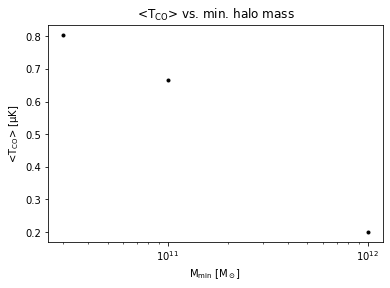

In [42]:
plt.plot(m_arr, t_arr, '.k')
plt.title(r'<$\rm{T_{CO}}$> vs. min. halo mass')
plt.xlabel(r'$\rm{M_{min}}$ [$\rm{M_\odot}$]')
plt.ylabel(r'<$\rm{T_{CO}}$> [µK]')
plt.xscale("log")
plt.savefig("tco_coarse.pdf")

1.3: Now having written $\texttt{new}\_\texttt{limlam}\_\texttt{mocker.py}$, we can iterate the same process from part 1.1 and 1.2 but over a logspace range of values for the minimum mass.

The upper bound and lower bound of that range can be specified in $\texttt{new}\_\texttt{limlam}\_\texttt{mocker.py}$. The number of iterations $N$ can be specified in $\texttt{new}\_\texttt{params.py}$. Everything can be ran in the terminal with for example the command $\texttt{python3 new}\_\texttt{limlam}\_\texttt{mocker.py}$. The resulting $\texttt{.npz}$ files are stored in the $\texttt{Lco}\_\texttt{files}$ directory, which is located in the home directory.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import new_params
import Lco_files

In [18]:
N = new_params.N

In [19]:
new_co_output = [[] for i in range(N)]
for i in range(N):
    new_co_output[i] = np.load('Lco_files/Lco_cube_trial_%i.npz' % i, allow_pickle=True)

In [20]:
meanz = [[] for i in range(N)]
for i in range(N):
    meanz[i] = np.mean(new_co_output[i]['map_cube'])

In [21]:
new_m_arr = 3*np.logspace(10, 12, N)

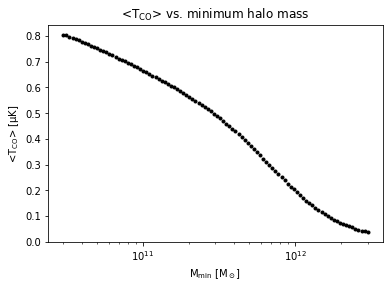

In [43]:
plt.plot(new_m_arr, meanz, '.k')
plt.title(r'<$\rm{T_{CO}}$> vs. minimum halo mass')
plt.xlabel(r'$\rm{M_{min}}$ [$\rm{M_\odot}$]')
plt.ylabel(r'<$\rm{T_{CO}}$> [µK]')
plt.xscale("log")
plt.savefig("tco_full.pdf")